In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from datetime import date
#Set pandas to print entire dataframe when print is called on it
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
# Get confirmed cases counts from John Hopkins and remove unnecessary columns
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
confirmed = pd.read_csv(url)
confirmed = confirmed.drop(['Province/State'], axis = 1)
confirmed = confirmed.drop(['Lat'], axis = 1)
confirmed = confirmed.drop(['Long'], axis = 1)

In [3]:
# Get death counts from John Hopkins and remove unnecessary columns
url1 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
deaths = pd.read_csv(url1)
deaths = deaths.drop(['Province/State'], axis = 1)
deaths = deaths.drop(['Lat'], axis = 1)
deaths = deaths.drop(['Long'], axis = 1)

In [4]:
# Get recovered cases counts from John Hopkins and remove unnecessary columns
url2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
recovered = pd.read_csv(url2)
recovered = recovered.drop(['Province/State'], axis = 1)
recovered = recovered.drop(['Lat'], axis = 1)
recovered = recovered.drop(['Long'], axis = 1)

In [5]:
# Combine states/territories within countries
confirmed = confirmed.groupby(['Country/Region'], group_keys = False).sum()
deaths = deaths.groupby(['Country/Region'], group_keys = False).sum()
recovered = recovered.groupby(['Country/Region'], group_keys = False).sum()

In [6]:
# Get top 10 countries with most positive cases
latest = confirmed.columns.values[-1:]
print()
topConfirmed = confirmed.nlargest(10, latest[0]).sort_index(axis = 0)
stopWords = topConfirmed.index.values

remove = recovered.index.values
remove = [word for word in remove if word not in stopWords]
topRecovered = recovered.drop(remove).sort_index(axis = 0)

remove = deaths.index.values
remove = [word for word in remove if word not in stopWords]
topDeaths = deaths.drop(remove).sort_index(axis = 0)

In [7]:
# Get the total count of positive cases each day
topConfirmed = topConfirmed.diff(axis = 1)
topConfirmed = topConfirmed.fillna(0)
topConfirmed = topConfirmed.astype('int32')

topRecovered = topRecovered.diff(axis = 1)
topRecovered = topRecovered.fillna(0)
topRecovered = topRecovered.astype('int32')

topDeaths = topDeaths.diff(axis = 1)
topDeaths = topDeaths.fillna(0)
topDeaths = topDeaths.astype('int32')

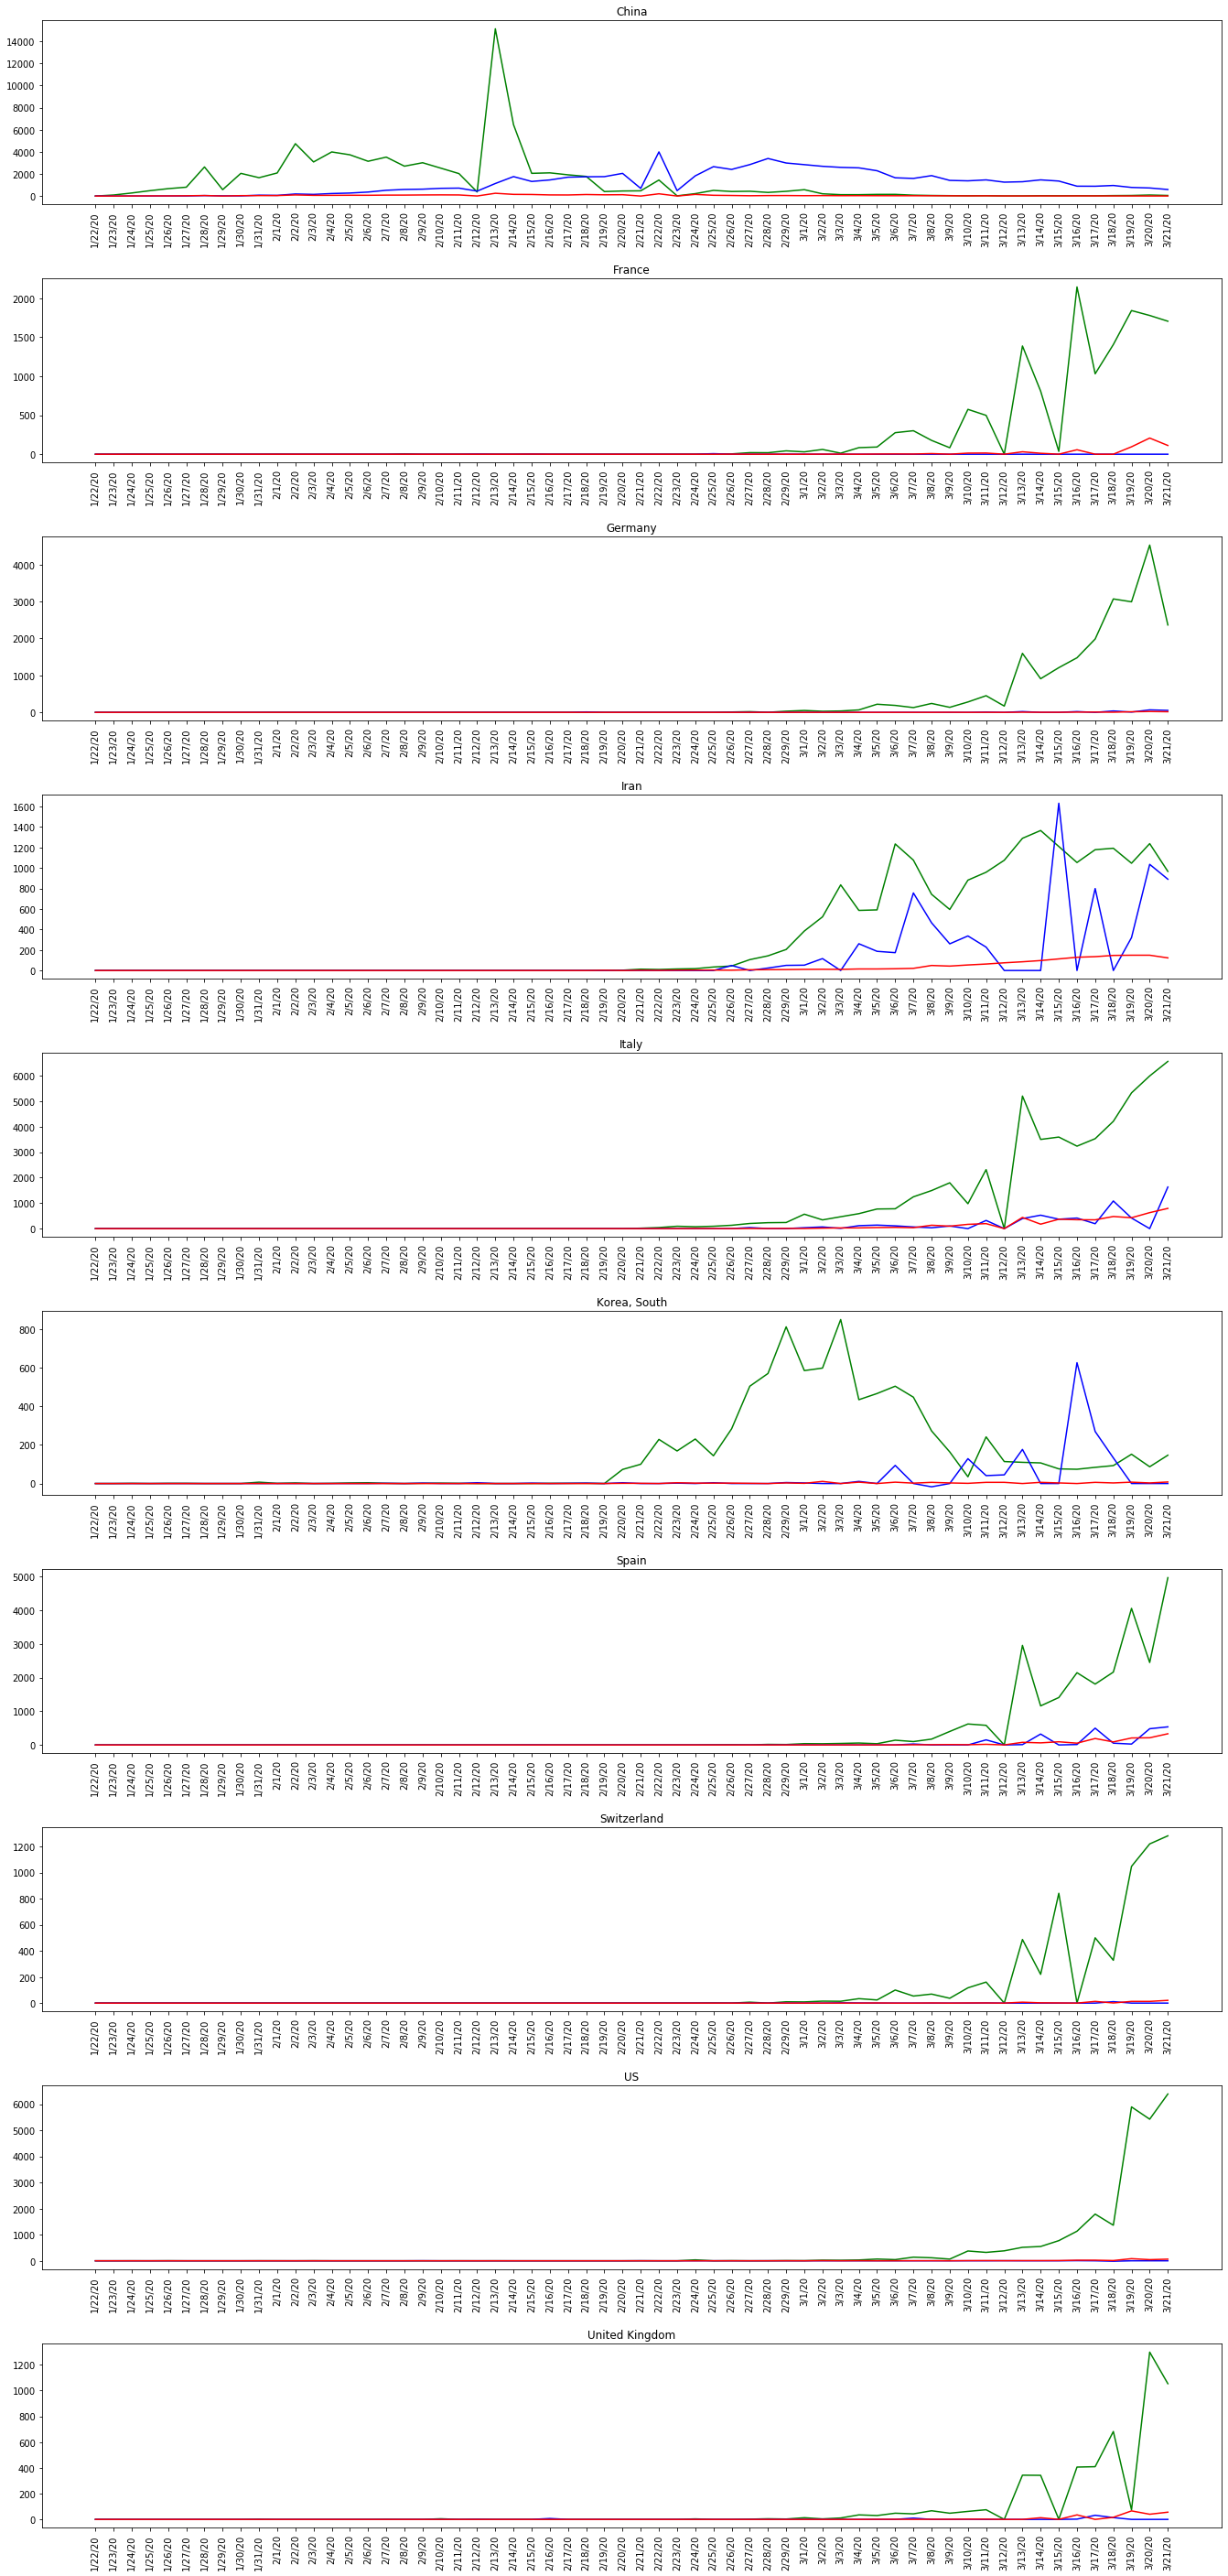

In [8]:
# Plot the findings
i = 0
matplotlib.rcParams['figure.figsize'] = [20, 40]
fig, axs = plt.subplots(10)
fig.tight_layout(pad = 6.0)
for index, row in topConfirmed.iterrows():
    row = row.to_numpy()
    m = topConfirmed.columns.values
    axs[i].plot(m, row, 'g')
    axs[i].set_title(index)
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)
    i += 1
    
i = 0
for index, row in topRecovered.iterrows():
    row = row.to_numpy()
    m = topRecovered.columns.values
    axs[i].plot(m, row, 'b')
    i += 1

i = 0
for index, row in topDeaths.iterrows():
    row = row.to_numpy()
    m = topDeaths.columns.values
    axs[i].plot(m, row, 'r')
    i += 1